In [ ]:
Qlqimport numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
import plotly.express as px

In [ ]:
df=pd.read_csv("/content/data set.csv")
df.head()

,temperature,humidity,rainfall,label
0,20.879744,82.002744,202.935536,rice
1,21.770462,80.319644,226.655537,rice
2,23.004459,82.320763,263.964248,rice
3,26.491096,80.158363,242.864034,rice
4,20.130175,81.604873,262.717340,rice


In [ ]:
df["label"].unique()

array(['rice', 'maize', 'chickpea', 'kidneybeans', 'pigeonpeas',
       'mothbeans', 'mungbean', 'blackgram', 'lentil', 'pomegranate',
       'banana', 'mango', 'grapes', 'watermelon', 'muskmelon', 'apple',
       'orange', 'papaya', 'coconut', 'cotton', 'jute', 'coffee'],
      dtype=object)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  2200 non-null   float64
 1   humidity     2200 non-null   float64
 2   rainfall     2200 non-null   float64
 3   label        2200 non-null   object 
dtypes: float64(3), object(1)
memory usage: 68.9+ KB


In [ ]:
df.isnull().sum()

N              0
P              0
K              0
temperature    0
humidity       0
ph             0
rainfall       0
label          0
dtype: int64

In [ ]:
df["label"].head(2022)

0       rice
1       rice
2       rice
3       rice
4       rice
        ... 
2017    jute
2018    jute
2019    jute
2020    jute
2021    jute
Name: label, Length: 2022, dtype: object

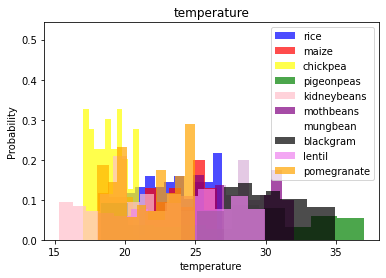

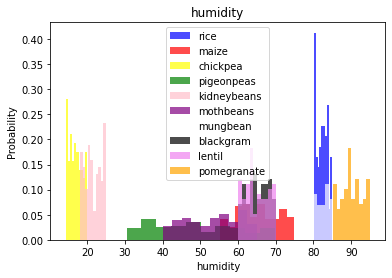

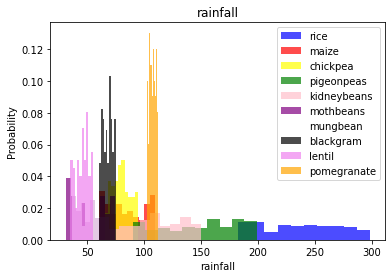

In [ ]:
for label in df.columns[:-1]:
  plt.hist(df[df["label"]=="rice"][label], color='blue', label='rice', alpha=.7, density=True)
  plt.hist(df[df["label"]=="maize"][label], color='red', label='maize', alpha=.7, density=True)
  plt.hist(df[df["label"]=="chickpea"][label], color='yellow', label='chickpea', alpha=.7, density=True)
  plt.hist(df[df["label"]=="pigeonpeas"][label], color='green', label='pigeonpeas', alpha=.7, density=True)
  plt.hist(df[df["label"]=="kidneybeans"][label], color='pink', label='kidneybeans', alpha=.7, density=True)
  plt.hist(df[df["label"]=="mothbeans"][label], color='purple', label='mothbeans', alpha=.7, density=True)
  plt.hist(df[df["label"]=="mungbean"][label], color='white', label='mungbean', alpha=.7, density=True)
  plt.hist(df[df["label"]=="blackgram"][label], color='black', label='blackgram', alpha=.7, density=True)
  plt.hist(df[df["label"]=="lentil"][label], color='violet', label='lentil', alpha=.7, density=True)
  plt.hist(df[df["label"]=="pomegranate"][label], color='orange', label='pomegranate', alpha=.7, density=True)

  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
y = df.label
X = df.drop(columns='label')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

In [ ]:
def scale_dataset(dataframe, oversample=False):
  X = dataframe[dataframe.columns[:-1]].values
  y = dataframe[dataframe.columns[-1]].values

  scaler = StandardScaler()
  X = scaler.fit_transform(X)

  if oversample:
    ros = RandomOverSampler()
    X, y = ros.fit_resample(X, y)

  data = np.hstack((X, np.reshape(y, (-1, 1))))

  return data, X, y

In [ ]:
train, X_train, y_train = scale_dataset(train, oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report

In [ ]:
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [ ]:
print(X_test.columns)

Index(['temperature', 'humidity', 'rainfall'], dtype='object')


In [ ]:
y_pred = knn_model.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       apple       0.55      0.88      0.68        24
      banana       0.95      0.88      0.91        24
   blackgram       0.70      1.00      0.83        26
    chickpea       0.88      1.00      0.93        28
     coconut       0.64      0.95      0.77        19
      coffee       0.68      0.96      0.79        24
      cotton       0.74      0.95      0.83        21
      grapes       0.91      0.83      0.87        24
        jute       0.92      0.86      0.89        28
 kidneybeans       1.00      0.83      0.90        23
      lentil       0.89      1.00      0.94        17
       maize       0.88      0.68      0.77        22
       mango       0.92      1.00      0.96        24
   mothbeans       1.00      0.72      0.84        29
    mungbean       0.92      0.89      0.91        27
   muskmelon       1.00      1.00      1.00        27
      orange       0.72      0.67      0.69        27
      papaya       0.94    

In [ ]:
user_input = [[39.00,75.00,40.00]]
df_2 = pd.DataFrame(user_input, columns = ['temperature', 'humidity', 'rainfall'])
y_pred = knn_model.predict(df_2)

In [ ]:
print(y_pred)

['mungbean']


In [ ]:
# Create a 3D scatter plot
fig = px.scatter_3d(df, x=df['temperature'], y=df['humidity'], z=df['rainfall'],
                    color=df['label'],
                    color_discrete_sequence=['#636EFA','#EF553B','#00CC96'], 
                    #hover_data=['X3 distance to the nearest MRT station', 'Y house price of unit area'],
                    height=900, width=900
                   )

# Update chart looks
fig.update_layout(#title_text="Scatter 3D Plot",
                  showlegend=True,
                  legend=dict(orientation="h", yanchor="top", y=1, xanchor="center", x=0.5),
                  scene_camera=dict(up=dict(x=0, y=0, z=1), 
                                        center=dict(x=0, y=0, z=-0.2),
                                        eye=dict(x=-1.5, y=1.5, z=0.5)),
                                        margin=dict(l=0, r=0, b=0, t=0),
                  scene = dict(xaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          dtick=0.01,
                                         ),
                               yaxis=dict(backgroundcolor='white',
                                          color='black',
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          dtick=0.01,
                                          ),
                               zaxis=dict(backgroundcolor='lightgrey',
                                          color='black', 
                                          gridcolor='#f0f0f0',
                                          title_font=dict(size=10),
                                          tickfont=dict(size=10),
                                          dtick=5
                                         )))

# Update marker size
fig.update_traces(marker=dict(size=2))

fig.show()